In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer

### Goal of our analysis ###

1st idea : Distinguish between puzzle solver and Instructor

In [2]:
df = pd.read_csv('HR_data.csv', index_col=0)
print(df.shape)
df.head()

(312, 67)


,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,0.9775,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,0.1900,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,0.3575,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,0.6500,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,0.3375,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [3]:
df.describe()

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,...,312.000000,312.000000,312.000000,312.000000,310.000000,312.000000,311.000000,311.000000,311.000000,310.000000
mean,78.549974,77.452869,6.545680,68.778365,92.451122,24307.558590,-0.054661,0.375978,-0.567952,0.518478,...,1.346154,1.057692,2.192308,1.221154,2.183871,1.381410,2.784566,1.051447,2.553055,2.912903
std,11.382695,12.093798,4.998885,9.341107,17.759683,4035.278119,1.671170,0.823875,0.391239,0.470043,...,0.617576,0.271719,1.037034,0.549014,1.027958,0.577199,1.113793,0.273430,1.173463,1.104050
min,57.606118,54.130000,0.834390,49.000000,67.200000,14853.260000,-1.644825,-2.230501,-3.366000,0.075000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,71.061238,69.971250,3.160342,62.192500,80.207500,21549.048750,-0.984473,-0.151022,-0.665208,0.292500,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,76.784284,75.600000,4.919862,67.565000,87.830000,23650.430000,-0.456978,0.361195,-0.457500,0.412500,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,3.000000
75%,83.566296,83.108750,8.006694,73.805000,99.452500,26543.927500,0.216412,0.988498,-0.317500,0.613750,...,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,4.000000,1.000000,3.000000,4.000000
max,151.942434,167.950000,32.155396,111.070000,172.470000,46069.990000,12.510032,3.225347,-0.112500,6.202500,...,4.000000,3.000000,5.000000,4.000000,5.000000,3.000000,5.000000,4.000000,5.000000,5.000000


In [13]:
# how many rows have missing values?

# print all rows that have at least one missing value
print(df.isna().sum().sum())
print(df[df.isna().any(axis=1)])

na = pd.DataFrame(df.isna().sum().T)
na.tail()

9
     HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
104   83.758589        83.075   3.465654      78.33      93.55  27219.015   
120   64.966797        62.725   7.655497      57.32      89.38  19803.415   
122   69.815920        72.050   4.761262      59.43      75.38  20807.725   
125   69.222492        65.350  10.880043      57.62      94.38  21041.055   
272   84.923904        86.950   7.378264      67.25      98.45  21224.175   

     HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  upset  \
104        1.316130    1.257816          -0.4300           0.4260  ...    1.0   
120        3.132358    1.991410          -0.9325           0.3175  ...    2.0   
122       -0.755575   -0.801089          -0.5125           0.3225  ...    2.0   
125       -0.330384    1.044434          -0.7600           0.5250  ...    3.0   
272       -0.716559   -0.555002          -3.3660           0.4400  ...    1.0   

     hostile  alert  ashamed  inspired  nervous 

,0
nervous,0
attentive,1
afraid,1
active,1
determined,2


In [19]:
idx_data = df.iloc[:, 0]
eda_data = df.loc[:, df.columns.str.startswith("EDA")]
hr_data = df.loc[:, df.columns.str.startswith("HR")]
temp_data = df.loc[:, df.columns.str.startswith("TEMP")]
quest_data = df[['Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']]

In [20]:
quest_data[quest_data.isna().any(axis=1)]

,Frustrated,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
104,3.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN
120,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,NaN
122,2.0,2.0,1.0,2.0,1.0,NaN,1.0,3.0,1.0,2.0,3.0
125,4.0,3.0,3.0,1.0,1.0,NaN,1.0,3.0,4.0,2.0,2.0


In [50]:
#get rows with missing values
df[df.isnull().any(axis=1)]
df = df.dropna()

In [51]:
#get non float columns
df.select_dtypes(exclude='float64')

,EDA_TD_P_Peaks,Round,Phase,Individual,Puzzler,Cohort
0,11,round_3,phase3,1,1,D1_4
1,15,round_3,phase2,1,1,D1_4
2,10,round_3,phase1,1,1,D1_4
3,12,round_2,phase3,1,1,D1_4
4,20,round_2,phase2,1,1,D1_4
...,...,...,...,...,...,...
307,22,round_4,phase2,26,1,D1_5
308,25,round_4,phase1,26,1,D1_5
309,15,round_1,phase3,26,1,D1_5
310,43,round_1,phase2,26,1,D1_5


Cohort is the aqcuisition round 

Frustrated         (0–10 VAS)
upset, hostile,
alert, ashamed,
inspired, nervous,
attentive, afraid,
active, determined   (0–5 Likert)

 11 columns total



In [52]:
df.loc[:, 'Individual'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [8]:
df.loc[:, 'Round'].unique()

array(['round_3', 'round_2', 'round_4', 'round_1'], dtype=object)

In [ ]:
df['Cohort'].value_counts() #maybe drop


Cohort
D1_1    96
D1_2    72
D1_4    48
D1_3    48
D1_6    24
D1_5    24
Name: count, dtype: int64

In [17]:
#drop cohort
df = df.drop(columns=['Cohort'])

c:\Users\konst\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\konst\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\konst\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\konst\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Best k = 2, silhouette = 0.218


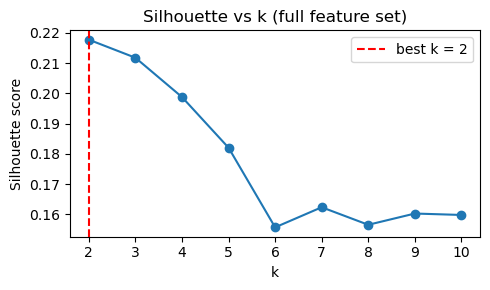

c:\Users\konst\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster sizes: [ 91 216]


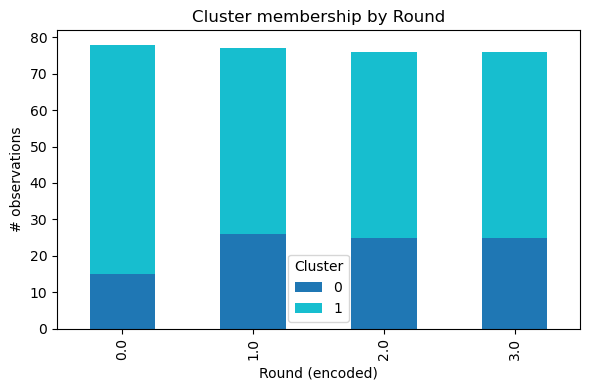

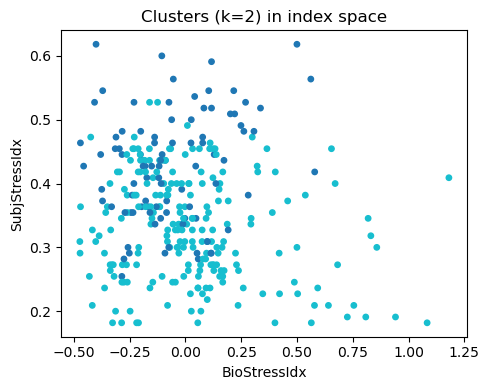

In [55]:
META_COLS  = ["Round", "Phase", "Cohort"]
QUEST_COLS = [
    "Frustrated", "upset", "hostile", "alert", "ashamed",
    "inspired", "nervous", "attentive", "afraid", "active", "determined",
]
PHYSIO_COLS = [c for c in df.columns if c.startswith(("HR_", "EDA_", "TEMP_"))]

# Ordinal‑encode metadata (strings -> ints)
encoder = OrdinalEncoder()
if df[META_COLS].dtypes.apply(lambda x: x == object).any():
    df[META_COLS] = encoder.fit_transform(df[META_COLS])

# -----------------------------
# 2. Build stress indices
# -----------------------------
# BioStressIdx: mean z‑score of physiological features
bio_matrix = SimpleImputer(strategy="mean").fit_transform(df[PHYSIO_COLS])
bio_z = StandardScaler().fit_transform(bio_matrix)
df["BioStressIdx"] = bio_z.mean(axis=1)

# SubjStressIdx: mean of questionnaire ratings scaled to [0,1]
subj_matrix = SimpleImputer(strategy="median").fit_transform(df[QUEST_COLS])
RATING_MAX = np.array([10] + [5] * 10)  # first item 0‑10, rest 0‑5
subj_scaled = subj_matrix / RATING_MAX
df["SubjStressIdx"] = subj_scaled.mean(axis=1)

# -----------------------------
# 3. Assemble final feature matrix
# -----------------------------
FEATURE_COLS = ["BioStressIdx", "SubjStressIdx"] + META_COLS + QUEST_COLS
X = df[FEATURE_COLS].values
X = SimpleImputer(strategy="median").fit_transform(X)  # ensure no NaNs

# -----------------------------
# 4. Silhouette search for best k
# -----------------------------
ks, sil = [], []
for k in range(2, 11):
    labels = KMeans(n_clusters=k, n_init=20, random_state=0).fit_predict(X)
    ks.append(k)
    sil.append(silhouette_score(X, labels))

best_k = ks[int(np.argmax(sil))]
print(f"Best k = {best_k}, silhouette = {max(sil):.3f}")

plt.figure(figsize=(5, 3))
plt.plot(ks, sil, marker="o")
plt.axvline(best_k, color="red", linestyle="--", label=f"best k = {best_k}")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k (full feature set)")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Final clustering and plots
# -----------------------------
km = KMeans(n_clusters=best_k, n_init=20, random_state=0).fit(X)
df["Cluster"] = km.labels_
print("Cluster sizes:", np.bincount(df["Cluster"]))

# Stacked bar chart of cluster counts across rounds
cluster_counts = (
    df.groupby(["Round", "Cluster"]).size().unstack(fill_value=0).sort_index()
)
cluster_counts.plot(kind="bar", stacked=True, figsize=(6, 4), colormap="tab10")
plt.xlabel("Round (encoded)")
plt.ylabel("# observations")
plt.title("Cluster membership by Round")
plt.tight_layout()
plt.show()

# Scatter plot of indices coloured by cluster
plt.figure(figsize=(5, 4))
plt.scatter(
    df["BioStressIdx"],
    df["SubjStressIdx"],
    c=df["Cluster"],
    cmap="tab10",
    s=15,
)
plt.xlabel("BioStressIdx")
plt.ylabel("SubjStressIdx")
plt.title(f"Clusters (k={best_k}) in index space")
plt.tight_layout()
plt.show()

# -----------------------------
# 6. Save clustered data (optional)
# -----------------------------
# df.to_csv('HR_data_with_clusters.csv', index=False)